In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
def Decision_Boundary(model, X, y, n_points, n_classes, colors, class_names):
    
    xmin, xmax = np.min(X[:,0]), np.max(X[:,0])
    ymin, ymax = np.min(X[:,1]), np.max(X[:,1])
    x_grid = np.linspace(xmin, xmax, n_points)
    y_grid = np.linspace(ymin, ymax, n_points)
    xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)
    xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
    predict_labels = model.predict(xy_grid)
    labels = range(n_classes)
    tt = zip(colors, class_names, labels)
    
    plt.figure (figsize = (20,10))
    plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
    for colors, class_names, labels in tt:
        idx = np.where(y == labels)
        plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
    plt.legend()
    plt.xlim(xmin-1, xmax+1)
    plt.ylim(ymin-1, ymax+1)
    plt.show()

In [4]:
X,y = make_classification(n_samples = 10000, n_features = 12, 
                     n_informative = 10, n_classes = 5, random_state = 0)
print(X.shape)
print(y.shape)

(10000, 12)
(10000,)


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3)

In [7]:
score = np.array([])
for j in np.arange(20) + 2:
    mod_tree = DecisionTreeClassifier(max_depth = j)
    mod_cv = cross_val_score(mod_tree, X_train,Y_train, 
                             cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.386
j-> 3 Mean-> 0.4272857142857143
j-> 4 Mean-> 0.4774285714285714
j-> 5 Mean-> 0.5267142857142858
j-> 6 Mean-> 0.5767142857142857
j-> 7 Mean-> 0.6085714285714285
j-> 8 Mean-> 0.6275714285714287
j-> 9 Mean-> 0.6361428571428572
j-> 10 Mean-> 0.6484285714285715
j-> 11 Mean-> 0.6488571428571428
j-> 12 Mean-> 0.6488571428571428
j-> 13 Mean-> 0.649
j-> 14 Mean-> 0.6458571428571428
j-> 15 Mean-> 0.6455714285714286
j-> 16 Mean-> 0.6472857142857144
j-> 17 Mean-> 0.6445714285714286
j-> 18 Mean-> 0.643
j-> 19 Mean-> 0.6401428571428571
j-> 20 Mean-> 0.6468571428571429
j-> 21 Mean-> 0.6398571428571429


13

In [8]:
mod_tree = DecisionTreeClassifier(max_depth = param)
mod_tree.fit(X_train,Y_train)
accuracy = mod_tree.score(X_test,Y_test)
print(param)
print("Accuracy - > ", accuracy)

13
Accuracy - >  0.6586666666666666


In [9]:
Y_predict = mod_tree.predict(X_train)
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1381
           1       0.94      0.95      0.94      1387
           2       0.96      0.96      0.96      1406
           3       0.97      0.94      0.95      1413
           4       0.95      0.95      0.95      1413

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000



In [10]:
Y_predict = mod_tree.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       616
           1       0.64      0.61      0.62       612
           2       0.70      0.71      0.70       599
           3       0.67      0.70      0.69       588
           4       0.62      0.62      0.62       585

    accuracy                           0.66      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.66      0.66      0.66      3000



In [14]:
score = np.array([])
for j in np.arange(8) + 2:
    mod_grad = GradientBoostingClassifier(max_depth = j)
    mod_cv = cross_val_score(mod_grad, X_train,Y_train, 
                             cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.679
j-> 3 Mean-> 0.7470000000000001
j-> 4 Mean-> 0.7867142857142857
j-> 5 Mean-> 0.808
j-> 6 Mean-> 0.8184285714285714
j-> 7 Mean-> 0.8227142857142858
j-> 8 Mean-> 0.8271428571428572
j-> 9 Mean-> 0.8288571428571428


9

In [15]:
mod_grad = GradientBoostingClassifier(max_depth = param)
mod_grad.fit(X_train,Y_train)
error = mod_grad.score(X_test,Y_test)
print(param)
print("Error - > ", error)

9
Error - >  0.8296666666666667


In [17]:
Y_predict = mod_grad.predict(X_train)
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00      1387
           2       1.00      1.00      1.00      1406
           3       1.00      1.00      1.00      1413
           4       1.00      1.00      1.00      1413

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [19]:
Y_predict = mod_grad.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       616
           1       0.82      0.80      0.81       612
           2       0.87      0.87      0.87       599
           3       0.83      0.83      0.83       588
           4       0.78      0.84      0.81       585

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



In [24]:
score = np.array([])
for j in np.arange(25) + 10:
    mod_forest = RandomForestClassifier(max_depth = j,
                                             max_features = 4,
                                             n_estimators = 200,
                                             oob_score = True)
    mod_forest.fit(X,y)
    error = np.append(error, mod_forest.oob_score_)
    print("j->", j, "Mean->", mod_forest.oob_score_)
param = np.argmax(error) + 2
param

j-> 10 Mean-> 0.7956
j-> 11 Mean-> 0.8101
j-> 12 Mean-> 0.8173
j-> 13 Mean-> 0.8241
j-> 14 Mean-> 0.8257
j-> 15 Mean-> 0.8277
j-> 16 Mean-> 0.8316
j-> 17 Mean-> 0.8322
j-> 18 Mean-> 0.8341
j-> 19 Mean-> 0.8327
j-> 20 Mean-> 0.8324
j-> 21 Mean-> 0.832
j-> 22 Mean-> 0.8359
j-> 23 Mean-> 0.8314
j-> 24 Mean-> 0.8349
j-> 25 Mean-> 0.834
j-> 26 Mean-> 0.8341
j-> 27 Mean-> 0.8337
j-> 28 Mean-> 0.8338
j-> 29 Mean-> 0.8348
j-> 30 Mean-> 0.832
j-> 31 Mean-> 0.8345
j-> 32 Mean-> 0.831
j-> 33 Mean-> 0.8323
j-> 34 Mean-> 0.8331


15

In [25]:
mod_forest = RandomForestClassifier(max_depth = param,
                                             max_features = 4,
                                             n_estimators = 100,
                                             oob_score = True)
mod_forest.fit(X,y)
error = mod_forest.score(X_test,Y_test)
print(param)
print("Error - > ", error)

15
Error - >  0.9956666666666667


In [27]:
Y_predict = mod_forest.predict(X_train)
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1381
           1       1.00      1.00      1.00      1387
           2       1.00      1.00      1.00      1406
           3       1.00      1.00      1.00      1413
           4       1.00      1.00      1.00      1413

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [28]:
Y_predict = mod_forest.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       616
           1       1.00      1.00      1.00       612
           2       0.99      0.99      0.99       599
           3       1.00      0.99      0.99       588
           4       1.00      0.99      0.99       585

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [30]:
score = np.array([])
for j in np.arange(20) + 2:
    mod_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = j), 
                                         n_estimators = 100)
    mod_cv = cross_val_score(mod_ada, X_train,Y_train, 
                             cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 2
param

j-> 2 Mean-> 0.6435714285714286
j-> 3 Mean-> 0.6858571428571428
j-> 4 Mean-> 0.7065714285714285
j-> 5 Mean-> 0.7255714285714285
j-> 6 Mean-> 0.7612857142857142
j-> 7 Mean-> 0.7895714285714286
j-> 8 Mean-> 0.8099999999999999
j-> 9 Mean-> 0.8145714285714286
j-> 10 Mean-> 0.8267142857142856
j-> 11 Mean-> 0.8331428571428571
j-> 12 Mean-> 0.8338571428571429
j-> 13 Mean-> 0.8384285714285713
j-> 14 Mean-> 0.8371428571428572
j-> 15 Mean-> 0.8397142857142856
j-> 16 Mean-> 0.8411428571428573
j-> 17 Mean-> 0.8379999999999999
j-> 18 Mean-> 0.8427142857142856
j-> 19 Mean-> 0.8428571428571429
j-> 20 Mean-> 0.7938571428571428
j-> 21 Mean-> 0.7567142857142858


19

In [34]:
mod_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = param), 
                                         n_estimators = 100)
mod_ada.fit(X_train,Y_train)
error = mod_ada.score(X_test,Y_test)
print(param)
print("Error - > ", error)

19
Error - >  0.851


In [55]:
X,y = make_classification(n_samples = 1000, n_features = 2, n_classes = 4, random_state = 0, n_redundant = 0,
                         n_clusters_per_class = 1,class_sep = 2)
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [58]:
mod_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), 
                                         n_estimators = 100)
mod_ada.fit(X,y)
error = mod_ada.score(X,y)
print(param)
print("Error - > ", error)

19
Error - >  0.988


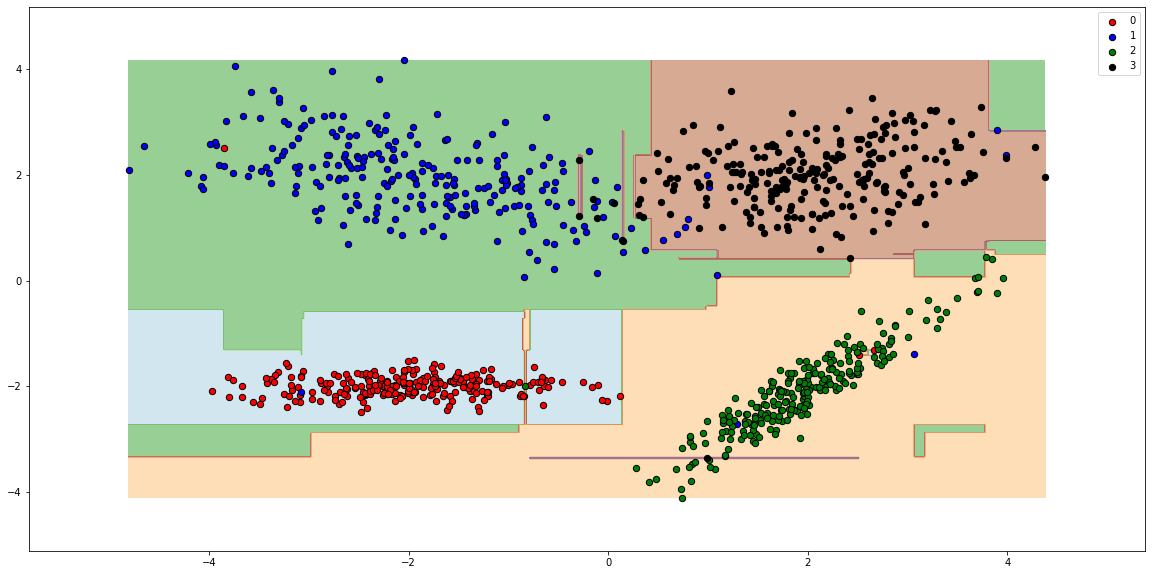

In [59]:
classes = 4 
colors = 'rbgk'
names = '0123'
Decision_Boundary(mod_ada, X, y, n_points = 500, n_classes = classes, colors = colors, class_names = names)